<a href="https://colab.research.google.com/github/desmondg19/CLPSProject2/blob/main/RI_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy 

In [65]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
#Read dataset Summary of Rhode Island Covid Data
Download_Data= drive.CreateFile({'id':'1t9lw59CK9ET3MIEVIp2WrZyqXC_0KW2R'})
Download_Data.GetContentFile('COVID-19 Rhode Island Data - Summary.csv')
RI_Data_Summary=pd.read_csv('COVID-19 Rhode Island Data - Summary.csv')
RI_Data_Summary.head()

,Last updated:,4/9/2021
0,Daily number of positive tests (may count peop...,494
1,3-day average of daily number of positive test...,546
2,Cumulative positive tests (may count people mo...,167334
3,Daily number of negative tests (may count peop...,17122
4,Cumulative negative tests (may count people mo...,3512737


In [66]:
#Read in dataset Rhode Island Demographics
Download_Data2= drive.CreateFile({'id':'1l8HabO1Jua2aylMYNgpX4wuct4UpIWJv'})
Download_Data2.GetContentFile('COVID-19 Rhode Island Data - Demographics.csv')
RI_Data_Demographics=pd.read_csv('COVID-19 Rhode Island Data - Demographics.csv', skiprows=1)
RI_Data_Demographics.info()
RI_Data_Demographics.head()


<class 'pandas.core.frame.DataFrame'>
Index: 57 entries, Age Group to Last Updated:
Data columns (total 14 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0    (Positive and Negative)"                 47 non-null     object
 1   Unnamed: 1                                45 non-null     object
 2   Cases                                     46 non-null     object
 3   Unnamed: 3                                45 non-null     object
 4   Hospitalizations                          46 non-null     object
 5   Unnamed: 5                                45 non-null     object
 6   Deaths                                    46 non-null     object
 7   Unnamed: 7                                45 non-null     object
 8   All People At Least Partially Vaccinated  46 non-null     object
 9   Unnamed: 9                                45 non-null     object
 10  All People Fully Vaccinated           

,"(Positive and Negative)""",Unnamed: 1,Cases,Unnamed: 3,Hospitalizations,Unnamed: 5,Deaths,Unnamed: 7,All People At Least Partially Vaccinated,Unnamed: 9,All People Fully Vaccinated,Unnamed: 11,Total Vaccine Doses Administered,Unnamed: 13
Age Group,"N=794,928",NaN,"N=119,036",NaN,"N=9,606",NaN,"N=2,627",NaN,"N=353,267",NaN,"N=242,222",NaN,"N=579,428",NaN
0-4,26290,3%,2720,2%,81,1%,<5,--,0,0%,0,0%,0,0%
5-9,34482,4%,3392,3%,25,<1%,0,0%,0,0%,0,0%,0,0%
10-14,35939,5%,4330,4%,35,<1%,<5,--,<5,--,0,0%,<5,--
15-18,40934,5%,5852,5%,65,1%,0,0%,2304,1%,707,<1%,2936,1%


In [5]:
RI_Data_Demographics.describe()

,"(Positive and Negative)""",Unnamed: 1,Cases,Unnamed: 3,Hospitalizations,Unnamed: 5,Deaths,Unnamed: 7,All People At Least Partially Vaccinated,Unnamed: 9,All People Fully Vaccinated,Unnamed: 11,Total Vaccine Doses Administered,Unnamed: 13
count,47,45,46,45,46,45,46,45,46,45,46,45,46,45
unique,31,16,46,23,41,19,18,15,25,17,24,16,25,16
top,--,--,602,--,0,--,--,--,--,--,--,--,--,--
freq,17,21,1,9,3,11,17,29,18,23,18,22,18,23


In [34]:
#Read in dataset RI COVID cases by Race
Download_Data3= drive.CreateFile({'id':'1dddZYTsRMpMDQCIjKSWSIehCJSChlQL2'})
Download_Data3.GetContentFile('COVID-19 Rhode Island Data - Case Trends by Race.csv')
RI_Data_Race=pd.read_csv('COVID-19 Rhode Island Data - Case Trends by Race.csv', skiprows=6, skip_blank_lines='true')
#Change the title of each column
new_names={'Hispanic or Latino†': 'Hispanic or Latino', 'American Indian or Alaska Native*': 'American Indian or Alaska Native', 'Asian*':'Asian', 'Black or African American*':'Black or African American', 'White*':'White', 'Other race*':'Other race', 'Multiple race*':'Multiple race'}
RI_Data_Race.rename(columns=new_names, inplace=True)

#Insert new column
weeks=[i for i in range (0, 57)]
RI_Data_Race.insert(0, "Weeks Since 3/1/20", weeks)

#Replace <5 values with 4
mydf=RI_Data_Race.replace('<5', 4)



#changed string to int to calculate cumsum
Asian=np.cumsum(mydf['Asian'].to_numpy(dtype=np.float32))
Hispanic_or_Latino=np.cumsum(mydf['Hispanic or Latino'].to_numpy(dtype=np.float32))
American_Indian_or_Alaska_Native=np.cumsum(mydf['American Indian or Alaska Native'].to_numpy(dtype=np.float32))
Black_or_African_American=np.cumsum(mydf['Black or African American'].to_numpy(dtype=np.float32))
White=np.cumsum(mydf['White'].to_numpy(dtype=np.float32))
Other_race=np.cumsum(mydf['Other race'].to_numpy(dtype=np.float32))
Multiple_race=np.cumsum(mydf['Multiple race'].to_numpy(dtype=np.float32))

#create new dataset
Race_rates={'Asian':Asian, 'Hispanic or Latino': Hispanic_or_Latino, 'American Indian or Alaska Native': American_Indian_or_Alaska_Native, 'Black or African American':Black_or_African_American, 'White':White, 'Other Race': Other_race, 'Multiple Races':Multiple_race, 'Weeks Since 3/1/2020':weeks}
df_Race_rates = pd.DataFrame(Race_rates)
df_Race_rates

#print(mydf['Asian'].to_numpy(dtype=np.float32))

#RI_Data_Race['Asian'] = 4*(RI_Data_Race.Asian == '<5').astype(int)


    Weeks Since 3/1/20  ...  Total
0                    0  ...      4
1                    1  ...     18
2                    2  ...     69
3                    3  ...    217
4                    4  ...    605
5                    5  ...  1,767
6                    6  ...  1,897
7                    7  ...  2,492
8                    8  ...  1,883
9                    9  ...  1,769
10                  10  ...  1,396
11                  11  ...  1,044
12                  12  ...    801
13                  13  ...    604
14                  14  ...    457
15                  15  ...    352
16                  16  ...    343
17                  17  ...    273
18                  18  ...    314
19                  19  ...    472
20                  20  ...    601
21                  21  ...    644
22                  22  ...    668
23                  23  ...    602
24                  24  ...    687
25                  25  ...    520
26                  26  ...    467
27                  

try to add comlumn, "weeks since March 1st, 2020" so can graph this instead of week of result date

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

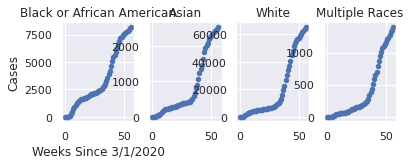

In [11]:
#Scatter plots for number of cases since March 2020 by race in RI
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(2,4,1)
df_Race_rates.plot(kind='scatter', x='Weeks Since 3/1/2020', y='Black or African American', ax=ax)
plt.xlabel('Weeks Since 3/1/2020')
plt.ylabel('Cases')
plt.title('Black or African American')


ax = fig.add_subplot(2,4,2)
df_Race_rates.plot(kind='scatter', x='Weeks Since 3/1/2020', y='Asian', ax=ax)
plt.xlabel('')
plt.ylabel('')
plt.title('Asian')


ax = fig.add_subplot(2,4,3)
df_Race_rates.plot(kind='scatter', x='Weeks Since 3/1/2020', y='White', ax=ax)
plt.xlabel('')
plt.ylabel('')
plt.title('White')


ax = fig.add_subplot(2,4,4)
df_Race_rates.plot(kind='scatter', x='Weeks Since 3/1/2020', y='Multiple Races', ax=ax)
plt.xlabel('')
plt.ylabel('')
plt.title('Multiple Races')

plt.show()

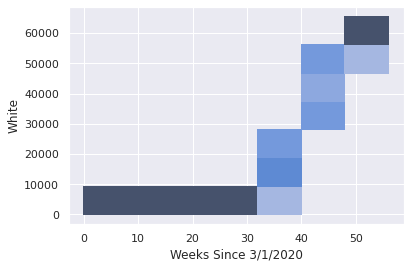

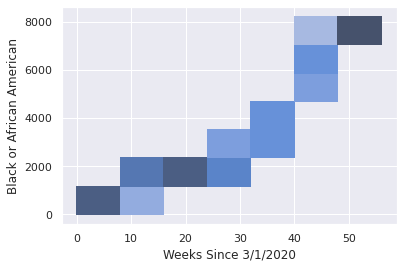

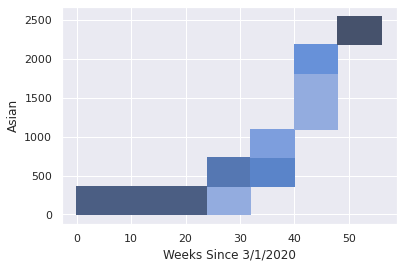

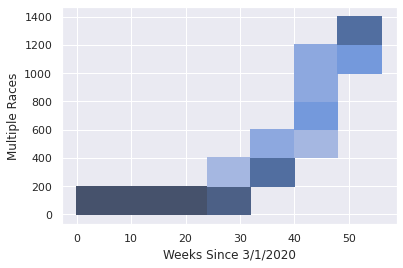

In [9]:
#create histogram 

import seaborn as sns
sns.set(style="darkgrid")
sns.histplot(data=df_Race_rates, x="Weeks Since 3/1/2020", y="White")
plt.show()

sns.histplot(data=df_Race_rates, x="Weeks Since 3/1/2020", y="Black or African American")
plt.show()

sns.histplot(data=df_Race_rates, x="Weeks Since 3/1/2020", y="Asian")
plt.show()

sns.histplot(data=df_Race_rates, x="Weeks Since 3/1/2020", y="Multiple Races")
plt.show() 

In [86]:
#Correlation plot for vaccines administered and age group in RI
RI_Data_Demographics_Age=RI_Data_Demographics[0:12]
RI_Data_Demographics_Age=RI_Data_Demographics_Age.replace('<5', 0)
df = pd.DataFrame(RI_Data_Demographics_Age,columns=['Age Group', 'Total Vaccine Doses Administered'])
print(df)

corrMatrix = df.corr()
#plt.matshow(corrMatrix)

#plt.matshow(RI_Data_Demographics['Age Group', 'Total Vaccine Doses Administered'])

           Age Group Total Vaccine Doses Administered
Age Group        NaN                        N=579,428
0-4              NaN                                0
5-9              NaN                                0
10-14            NaN                                0
15-18            NaN                             2936
19-24            NaN                            20148
25-29            NaN                            22917
30-39            NaN                            52835
40-49            NaN                            57610
50-59            NaN                            84182
60-69            NaN                           149347
70-79            NaN                           121052


In [ ]:
!pip install plotly==4.14.3
!pip install plotly-geo
!pip install geopandas
!pip install pyshp
!pip install shapely

In [63]:
#Read in dataset Rhode Island Demographics
Download_Data4= drive.CreateFile({'id':'1a87E9gsZqLSa1pBEEBrlUsKtGUS5sTs1'})
Download_Data4.GetContentFile('COVID-19 Rhode Island Data - Municipal Rate Trends.csv')
RI_Data_Municipality_Rates=pd.read_csv('COVID-19 Rhode Island Data - Municipal Rate Trends.csv', skiprows=7, skip_blank_lines='true')

#Remove row with total population
RI_Data_Municipality_Rates.drop([0])


#Replace asteriks with 0
mydf1=RI_Data_Municipality_Rates.replace('*', 0)
mydf1=mydf1.replace(',', '')
mydf1=mydf1.drop([0])
mydf1.head()

#changed string to int to calculate cumsum
Barrington=np.cumsum(mydf1['BARRINGTON'].to_numpy(dtype=np.float32))
Bristol=np.cumsum(mydf1['BRISTOL'].to_numpy(dtype=np.float32))
Burrillville=np.cumsum(mydf1['BURRILLVILLE'].to_numpy(dtype=np.float32))
Central_falls=np.cumsum(mydf1['CENTRAL FALLS'].to_numpy(dtype=np.float32))
Charlestown=np.cumsum(mydf1['CHARLESTOWN'].to_numpy(dtype=np.float32))
Coventry=np.cumsum(mydf1['COVENTRY'].to_numpy(dtype=np.float32))
Cranston=np.cumsum(mydf1['CRANSTON'].to_numpy(dtype=np.float32))
Cumberland=np.cumsum(mydf1['CUMBERLAND'].to_numpy(dtype=np.float32))
East_Greenwich=np.cumsum(mydf1['EAST GREENWICH'].to_numpy(dtype=np.float32))
East_Providence=np.cumsum(mydf1['EAST PROVIDENCE'].to_numpy(dtype=np.float32))
Exeter=np.cumsum(mydf1['EXETER'].to_numpy(dtype=np.float32))
Foster=np.cumsum(mydf1['FOSTER'].to_numpy(dtype=np.float32))
Glocester=np.cumsum(mydf1['GLOCESTER'].to_numpy(dtype=np.float32))
Hopkinton=np.cumsum(mydf1['HOPKINTON'].to_numpy(dtype=np.float32))
Jamestown=np.cumsum(mydf1['JAMESTOWN'].to_numpy(dtype=np.float32))
Johnston=np.cumsum(mydf1['JOHNSTON'].to_numpy(dtype=np.float32))
Lincoln=np.cumsum(mydf1['LINCOLN'].to_numpy(dtype=np.float32))
Little_Compton=np.cumsum(mydf1['LITTLE COMPTON'].to_numpy(dtype=np.float32))
Middletown=np.cumsum(mydf1['MIDDLETOWN'].to_numpy(dtype=np.float32))
Narragansett=np.cumsum(mydf1['NARRAGANSETT'].to_numpy(dtype=np.float32))
New_Shoreham=np.cumsum(mydf1['NEW SHOREHAM'].to_numpy(dtype=np.float32))
Newport=np.cumsum(mydf1['NEWPORT'].to_numpy(dtype=np.float32))
North_Kingstown=np.cumsum(mydf1['NORTH KINGSTOWN'].to_numpy(dtype=np.float32))
North_Providence=np.cumsum(mydf1['NORTH PROVIDENCE'].to_numpy(dtype=np.float32))
North_Smithfield=np.cumsum(mydf1['NORTH SMITHFIELD'].to_numpy(dtype=np.float32))
Pawtucket=np.cumsum(mydf1['PAWTUCKET'].to_numpy(dtype=np.float32))
Portsmouth=np.cumsum(mydf1['PORTSMOUTH'].to_numpy(dtype=np.float32))
Providence=np.cumsum(mydf1['PROVIDENCE'].to_numpy(dtype=np.float32))
Richmond=np.cumsum(mydf1['RICHMOND'].to_numpy(dtype=np.float32))
Scituate=np.cumsum(mydf1['SCITUATE'].to_numpy(dtype=np.float32))
Smithfield=np.cumsum(mydf1['SMITHFIELD'].to_numpy(dtype=np.float32))
South_Kingstown=np.cumsum(mydf1['SOUTH KINGSTOWN'].to_numpy(dtype=np.float32))
Tiverton=np.cumsum(mydf1['TIVERTON'].to_numpy(dtype=np.float32))
Warren=np.cumsum(mydf1['WARREN'].to_numpy(dtype=np.float32))
Warwick=np.cumsum(mydf1['WARWICK'].to_numpy(dtype=np.float32))
West_Greenwich=np.cumsum(mydf1['WEST GREENWICH'].to_numpy(dtype=np.float32))
West_Warwick=np.cumsum(mydf1['WEST WARWICK'].to_numpy(dtype=np.float32))
Westerly=np.cumsum(mydf1['WESTERLY'].to_numpy(dtype=np.float32))
Woonsocket=np.cumsum(mydf1['WOONSOCKET'].to_numpy(dtype=np.float32))




In [17]:
# Load the county boundary coordinates
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)
import plotly.figure_factory as ff

pa_fips = pa_race_covid['FIPS'].tolist()
RI_Towns = RI_Data_Municipality_Rates['BARRINGTON'].tolist()
RI_Towns = RI_Data_Municipality_Rates['BRISTOL'].tolist()
RI_Towns = RI_Data_Municipality_Rates['BURRILLVILLE'].tolist()
RI_Towns_endpts = list(np.mgrid[min(RI_Towns):max(RI_Towns):5j])
RI_Towns_fig = ff.create_choropleth(pa_fips, RI_Towns, scope=['Rhode Island'], show_state_data=True, 
                           binning_endpoints=RI_Town_endpts,
                           simplify_county = 0, simplify_state = 0,
                           show_hover = True, title = 'Covid Rates by Town',
                           legend_title='Covid Rates',
                           county_outline={'color': 'rgb(255,255,255)', 'width': 0.2})
RI_Towns_fig.show()

# Improve the legend
fig.update_layout(coloraxis_colorbar=dict(
    thicknessmode="pixels", thickness=10,
    lenmode="pixels", len=150,
    yanchor="top", y=0.8,
    ticks="outside", ticksuffix=" %",
    dtick=5
))

fig.show()

NameError: ignored

Check to see if really need the averages, or how to visually display- maybe box and wisker

F statistic = 40.598 and probability p = 0.000


TypeError: ignored

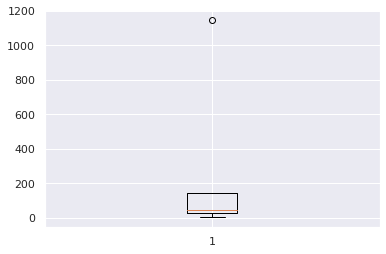

In [81]:
#one way ANOVA: Is there a statistical difference between COVID cases since March 1st by race in RI?
Asian_av=[np.mean(mydf['Asian'].to_numpy(dtype=np.float32))]
Black_av=[np.mean(mydf['Black or African American'].to_numpy(dtype=np.float32))]
Mult_av=[np.mean(mydf['Multiple race'].to_numpy(dtype=np.float32))]
White_av=[np.mean(mydf['White'].to_numpy(dtype=np.float32))]

#Create new dataset with average number of cases per week since March 1, 2020
Race_av={'Asian':Asian_av, 'Black or African American':Black_av, 'White':White_av, 'Multiple Races':Mult_av, 'Average number of cases per week since 3/1/2020':1}
df_Race_av = pd.DataFrame(Race_av, index=[1])

#Not totally sure if this boxplot is conceptually correct
ig, ax = plt.subplots()
ax.boxplot(df_Race_av)

Asian1=mydf['Asian']
White1=mydf['White']
Black1=mydf['Black or African American']
Mult1=mydf['Multiple race']

#Create Dataset
Race={'Race':['Asian','White','Black or African American','Multiple Races'], 'Cases': [Asian1, White1, Black1, Mult1]}
df_Race=pd.DataFrame(Race)

#ANOVA to determine if there is a statistical difference between the number of cases each week since 3/1/2020 by race in RI
F,p=scipy.stats.f_oneway(White1, Black1, Mult1, Asian1)
#F,p=scipy.stats.f_oneway(White, Black_or_African_American, Multiple_race, Asian)
print('F statistic = {:5.3f} and probability p = {:5.3f}'.format(F, p)) 

#Post hoc test to look at which relationships are significantly different
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=df_Race['Cases'], groups=df_Race['Race'],alpha=0.05)



There is enough evidence to reject the null hypothesis that there is no significant difference in COVID cases by race in RI.
